In [170]:
import numpy as np
import matplotlib.pyplot as plt

### 7. Movimento Subamortecido

---
**Enunciado**: Elabore um gráfico de $𝑥(𝑡)$ da equação 

$$𝑥(𝑡) = 𝐴𝑒^{-\beta t} \cos{\omega_1 𝑡 − \delta)}$$ 

com $𝐴 = 1,0 m$ e de seus dois componentes [$e^{\beta t}$ e $\cos{(\omega_1 𝑡 − 𝛿)}$] e das comparações com $\beta$ = 0. Considere rad/s e elabore gráficos separados para $\frac{\beta^2}{\omega_0^2}$ = 0.1, 0.5 e 0.9 e para $\delta$ (em radianos) = 0, 𝜋 2 e 𝜋. Inclua somente um valor de 𝛿 e 𝛽 em cada gráfico (isto é, nove gráficos). Discuta os resultados.


---


$\quad$ A equação que descreve a oscilação de um sistema subamortecido é

$$ x(t) = Ae^{-\beta t}\cos{(\omega_1 t - \delta)},$$

onde $\phi$ é uma fase qualquer e $\omega_1 = \sqrt{\omega_0^2-\beta^2}$, com $\omega_0$ sendo a frequência característica e $\beta$ o fator de amortecimento. 

$\quad$ Consideraremos $\omega_0 = 1 rad/s$, de tal forma que

$$\frac{\beta^2}{\omega_0^2} = a \implies \beta = \sqrt{\omega_0^2 a} \implies \beta = \sqrt{a}.$$

Para o problema em questão, $a$ asssume os valores 0.1, 0.5 e 0.9.

$\quad$ Constantes

In [171]:
A = 1.0
omegazero = 1
deltas = [0, np.pi/2, np.pi]
razao = [0.1, 0.5, 0.9]

$\quad$ Função

In [172]:
def x(t,beta,omega1,delta):
    return A*np.exp(-beta*t)*np.cos(omega1*t-delta) 

$\quad$ Plotagem

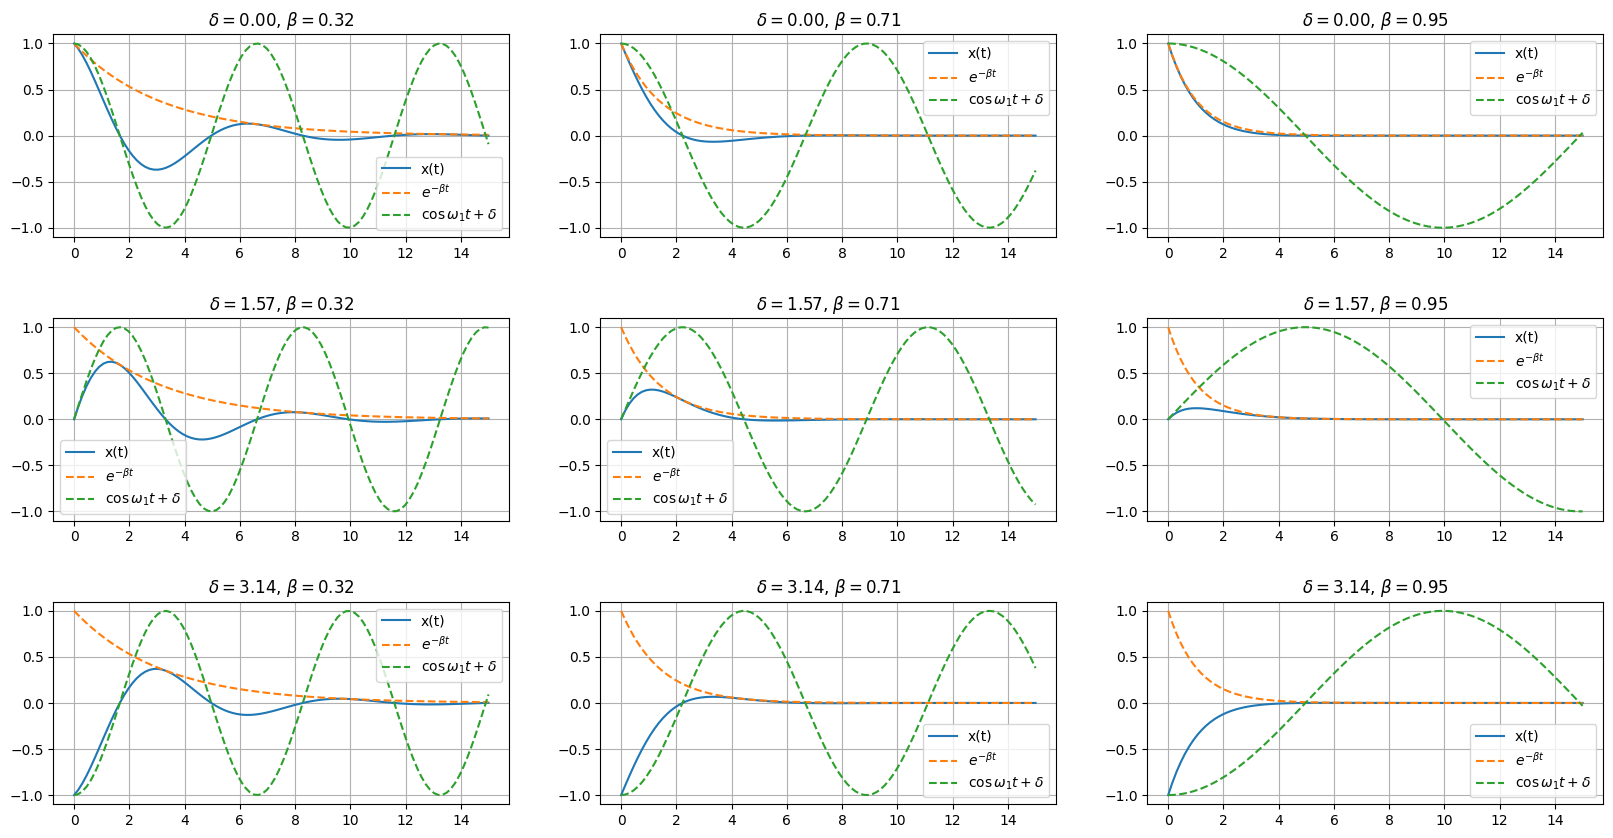

In [173]:
ti = 0 # Tempo inicial.
tf = 15 # Tempo final.
tempos = np.linspace(ti,tf,100) # Grade temporal.

fig, axes = plt.subplots(3, 3, figsize=(20, 10))

a = 0 # Para a enumeração dos plots.
for delta in deltas:
    o = 0 #Para a enumeração dos plots.
    for r in razao: 
        beta = omegazero*np.sqrt(r)
        omega1 = np.sqrt(omegazero**2 - beta**2) 

        x_points = []
        exponencial = []
        cosseno = []
        for i in range(len(tempos)):
            xi = x(tempos[i], beta, omega1, delta)
        
            x_points.append(xi)
            exponencial.append(np.exp(-beta*tempos[i]))
            cosseno.append(np.cos(omega1*tempos[i] - delta))

        axes[a][o].plot(tempos,x_points, label = r'x(t)')
        axes[a][o].plot(tempos,exponencial, '--', label = r'$e^{-\beta t}$')
        axes[a][o].plot(tempos,cosseno, '--', label = r'$\cos{\omega_1 t + \delta}$')
        axes[a][o].set_title(fr'$\delta = {delta:.2f}$, $\beta = {beta:.2f}$')
        axes[a][o].grid()
        axes[a][o].legend()
        o+=1
    a+=1

plt.subplots_adjust(hspace=0.4)
plt.show()

$\quad$ Para cada valor da fase $\delta$ (cada linha de gráfico), percebemos que ao aumentar o valor de $\beta$, do coeficiente de amortecimento, o sistema é forçado a encerrar sua oscilação de maneira mais rápida. Isto é, para valores não tão grandes de $\beta$, o sistema ainda tem tempo de realizar uma oscilação (amortecida, com amplitude decerescente com o tempo). Contudo, no caso de um $\beta$ muito grande, a amplitude de oscilação do sistema rapidamente cai a zero. Tal efeito ocorre de maneira semeslhante independente de qual seja o valor de $\delta$.

### 8. Oscilador Senoidal Impelido e Amortecido I

---
**Enunciado**: Elabore gráficos de $𝑥_𝑝(𝑡)$, $𝑥_𝑐(𝑡)$ e a soma $𝑥(𝑡)$ para um oscilador senoidal impelido e amortecido. Considere $\beta = 0.2 s^{−1}$, $𝑘 = 1 kg/s$ 2 e $𝑚 = 1 kg$.

a) Produza esses gráficos para valores de $\frac{\omega}{\omega_1}$, iguais a $\frac{1}{9}$ , $\frac{1}{3}$, $1.1$, $3$ e $6$.

b) Para a solução $𝑥_c(𝑡)$, $𝑥_c(𝑡) = 𝐴e^{-\beta t}\cos{(\omega_1 𝑡 − \delta)}$, considere o ângulo de fase $\delta = 0$ e a amplitude $𝐴 = 1 m/s^2$.

c) Para a solução $𝑥_p(𝑡)$, $𝑥_𝑝(𝑡) = \frac{A}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\omega^2 \beta^2}} \cos{(\omega t - \delta)}$, considere $𝐴 = 1 m/s^2$, mas calcule $\delta$.

d) O que se observa em relação às amplitudes relativas das duas soluções à medida que $\omega$ aumenta? Por que isto ocorre? 

(e) Para $\frac{\omega}{\omega_1}$, considere $𝐴 = 20 m/s^2$ para $𝑥_𝑝(𝑡)$ e produza o gráfico novamente.

---

In [174]:
# Constantes 
beta = 0.2
k = 1
m = 1

**Item a)**


---

**Item b)**

Considerando $𝑥_c(𝑡) = 𝐴e^{-\beta t}\cos{(\omega_1 𝑡 − \delta)}$, com $\delta = 0$ e $A = 1rad/s$, obtemos

$$ x_c(t) = e^{-\beta t}\cos{(\omega_1 𝑡)},$$

onde $\omega_1 = \sqrt{\omega_0^2 - \beta^2}.$


In [175]:
def x_c(t, omega1):
    return np.exp(-beta*t)*np.cos(omega1*t)

**Item c)**

Considerando $𝑥_𝑝(𝑡) = \frac{A}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\omega^2 \beta^2}} \cos{(\omega t - \delta)}$, com $A = 1rad/s$, obtemos

$$𝑥_𝑝(𝑡) = \frac{1}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\omega^2 \beta^2}} \cos{(\omega t - \delta)}$$

onde $\delta$ = $tg^{-1} \left( \frac{2\omega \beta}{\omega_0^2 -\omega^2}\right)$.



In [176]:
def x_p(t, omega, omega0):
    delta = np.arctan((2*omega*beta)/(omega0**2 - omega**2)) 
    return (1/np.sqrt((omega0**2 - omega**2)**2 + 4*(omega**2)*(beta**2)))*np.cos(omega*t - delta)

---

**Simulação**

 $\quad$ Nos é fornecidos os valores das constantes: $\beta = 1s^{-1}$, $k = 1 kg/s^2$ e $m=1kg$, de onde já podemos tirar que $\omega_0 = \sqrt{\frac{k}{m}} = \sqrt{\frac{1}{1}} = 1.$ Além disso, considerando uma das razões $\frac{\omega}{\omega_1} = a$, teremos que 

$$ \omega = a\omega_1 = a\sqrt{\beta^2-\omega_0^2} = a\sqrt{1^2-(0.2)^2} = a\sqrt{0.96}$$

In [177]:
omega0 = 1
omega1 = np.sqrt(0.96)
razoes = np.array([1/9, 1/3, 1.1, 3, 6], float)


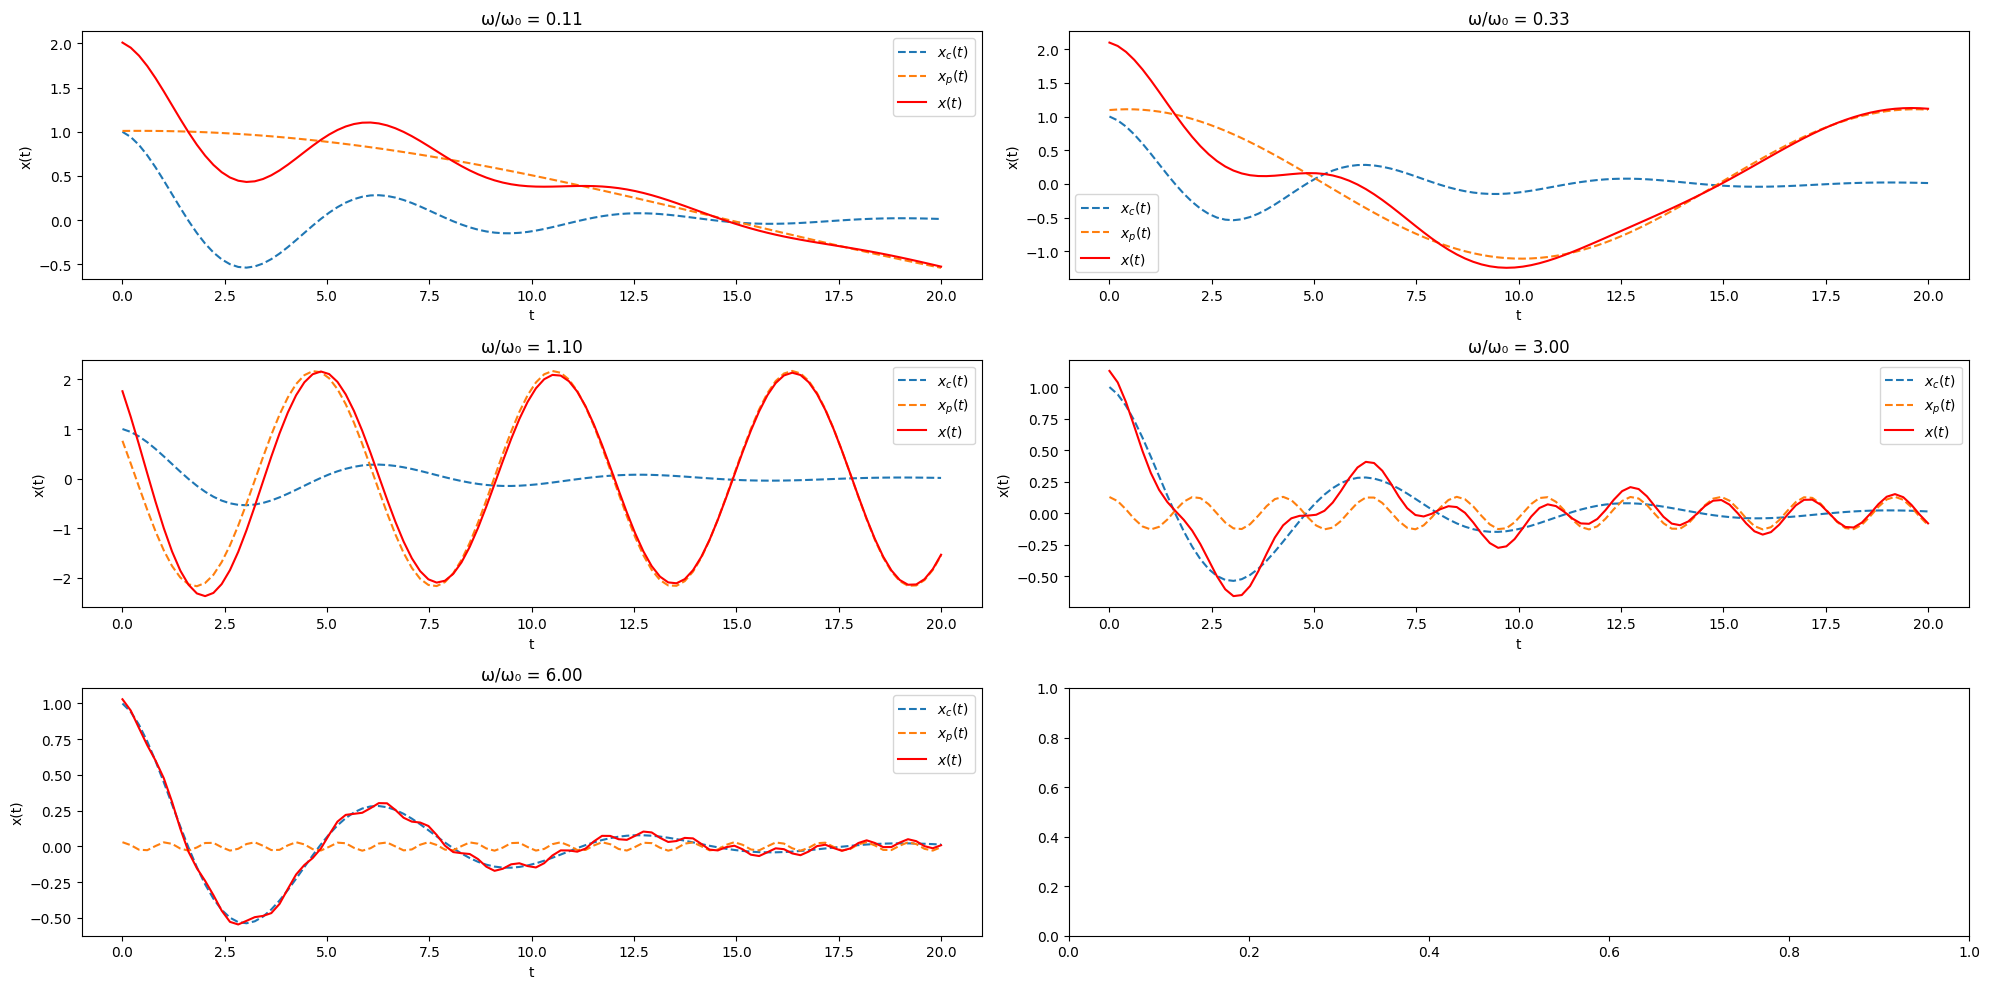

In [178]:
ti = 0
tf = 20
tempos = np.linspace(ti,tf,100)


fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes = axes.flatten()  # transforma a matriz 3x2 em um array 1D para facilitar a iteração

for i, r in enumerate(razoes):
    omega = r * omega1
    xc_points = [x_c(t, omega1) for t in tempos]
    xp_points = [x_p(t, omega, omega0) for t in tempos]
    x_points = [xc + xp for xc, xp in zip(xc_points, xp_points)]

    ax = axes[i]  # pega o subplot correspondente
    ax.plot(tempos, xc_points, '--',label=r'$x_c(t)$')
    ax.plot(tempos, xp_points, '--',label=r'$x_p(t)$')
    ax.plot(tempos, x_points, 'r',label=r'$x(t)$')
    ax.set_title(f'ω/ω₀ = {r:.2f}')
    ax.set_xlabel('t')
    ax.set_ylabel('x(t)')
    ax.legend()

plt.tight_layout()
plt.show()



---

**Item d)**

$\quad$ Nos gráficos percemos o comportamento esperado: quando maior a provimidade entre $\omega$ (frequência da força externa) e $\omega_1$ (a razão tendendo a $1$), mais a solução particular se assemelhará à solução geral. Do contrário, quanto maior a diferença entre essas frequência, a solução geral será governada principalmente pela solução complementar.

---

**Item e)**

$\quad$ Agora considerando $\frac{\omega}{\omega_1} = 6$ e $A = 20m/s^2$.

In [179]:
A = 20

def x_p(t, omega, omega0):
    delta = np.arctan((2*omega*beta)/(omega0**2 - omega**2)) 
    return (A/np.sqrt((omega0**2 - omega**2)**2 + 4*(omega**2)*(beta**2)))*np.cos(omega*t - delta)

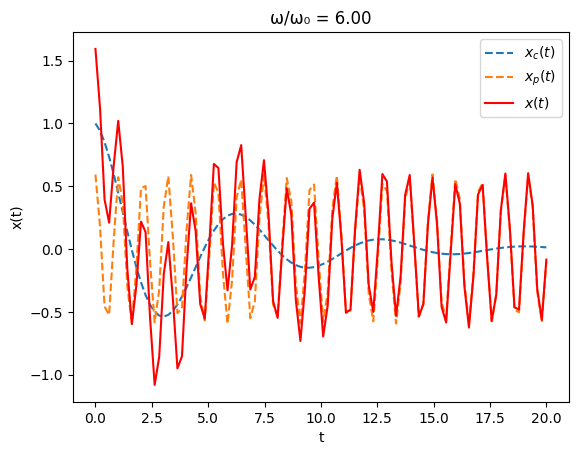

In [180]:
omega0 = 1
omega1 = np.sqrt(0.96)
razao = 6

omega = razao*omega1
xc_points = [x_c(t, omega1) for t in tempos]
xp_points = [x_p(t, omega, omega0) for t in tempos]
x_points = [xc + xp for xc, xp in zip(xc_points, xp_points)]


plt.plot(tempos, xc_points, '--',label=r'$x_c(t)$')
plt.plot(tempos, xp_points, '--',label=r'$x_p(t)$')
plt.plot(tempos, x_points, 'r',label=r'$x(t)$')
plt.title(f'ω/ω₀ = {r:.2f}')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

### 9. Oscilador Senoidal Impelido e Amortecido II

---
**Enunciado**: elabore gráficos de $𝑥_𝑝(𝑡)$, $x_c(t)$ e a soma $𝑥(𝑡)$ para um oscilador senoidal impelido e amortecido. Considere os valores $\beta = 1 s^{-1}$ , $𝑘 = 1 kg/s^2$ e $𝑚 = 1 kg$.

a) Produza esses gráficos para valores de $\frac{\omega}{\omega_1}$, iguais a $\frac{1}{9}$, $\frac{1}{3}$, $1.1$, $3$ e $6$.

b) Para a solução criticamente amortecida, $𝑥(𝑡) = (𝐴 + 𝐵𝑡)𝑒^{\beta t}$, considere $\delta = 0$, $𝐴 = −1 m$ e $𝐵 = 1 m/s$.

c) Para a solução $𝑥𝑝(𝑡)$, $𝑥_𝑝(𝑡) = \frac{A}{\sqrt{(\omega_0^2-\omega^2)^2 4\omega^2\beta^2}}\cos{(\omega t − \delta)}$, considere $𝐴 = 1 m/s^2$ e calcule $\delta$.

d) O que se observa em relação às amplitudes relativas das duas soluções à medida que 𝜔 aumenta? Por que isto ocorre?

e) Para $\frac{\omega}{\omega_1}=6$, considere $𝐴 = 20 m/s^2$ para $𝑥_𝑝(𝑡)$ e produza o gráfico novamente.


**Correção:** como numa oscilação criticamente forçada, $\omega_1$ é igual a zero, então não há sentido falar em $\frac{\omega}{\omega_1}$. Assim, assumi que o correto seria $\frac{\omega}{\omega_0}.$


---

In [181]:
#constantes
beta = 1
k = 1
m = 1

$\quad$ De acordo com os valores das constantes fornecidos, teremos que 

$$ \omega_0 = \sqrt{\frac{k}{m}} = 1,$$

que é exatamente o valor de $\beta$. Assim $\omega_0^2 = \beta^2$, caracterizando uma oscilação criticamente amortecida, onde o sistema retornará à sua posição de equilíbrio sem oscilar.

$\quad$ A solução completa para esse tipo de oscilação é 

$$ x(t) = x_c(t) + x_p(t),$$

onde $x_c(t) = (A+Bt)e^{-\beta t}$ é a solução complementar (trasiente) e $x_p(t) = \frac{A}{\sqrt{(\omega_0^2-\omega^2)-4\omega^2\beta^2}}\cos{(\omega t + \delta)}$

---

**item a)**



$\quad$ A partir das constantes fornecidas, consegumos determinar o valor de $\omega_0$ e $\omega_1$. Como $\omega_0 =\sqrt{\frac{k}{m}}$, teremos

$$ \omega_0 = \sqrt{\frac{1}{1}} = 1.$$

Assim, agora determinando $\omega_1 = \sqrt{\omega_0^2-\beta^2} = \sqrt{1-1} = 0.$

In [182]:
A = -1
B = 1
delta = 0

In [183]:
def x(t, omega1):
    return (A+B*t)*np.exp(-beta*t)*np.exp(-beta*t)

**Item c)**

$\quad$ Considerando que 

$$x_c(t) = \frac{A}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\omega^2 \beta^2}} \cos{(\omega t + \delta)}, $$

onde $\omega$ é a frequência da força de amortecimento, $\omega_0 = \sqrt{\frac{k}{m}}$ a frequência de oscilação natural, $\beta$ o coeficiente de amortecimento e $\delta = tg^{-1}\left( \frac{2\beta \omega}{\omega_0^2 - \omega^2}\right)$ a fase. Assim, como $\omega_0 = \sqrt{\frac{k}{m}} = \sqrt{\frac{1}{1}} = 1$, teremos que $\frac{\omega}{\omega_0} = \omega$. Por fim, a expressão $x_c(t)$ fica

$$x(t) =  \frac{A}{\sqrt{( 1 - \omega^2)^2 + 4\omega^2 \beta^2}} \cos{(\omega t + \delta)}.$$

In [184]:
omega0 = np.sqrt(k/m)
omegas = np.array([1/9, 1/3, 1.1, 3, 6], float)
A = 1

def x_c(t, omega):
    delta = np.arctan2(2*beta*omega, 1 - omega**2)

    return ((A)/(np.sqrt((1-omega**2)**2 +4*omega**2*beta**2 )))*(np.cos(omega*t + delta))



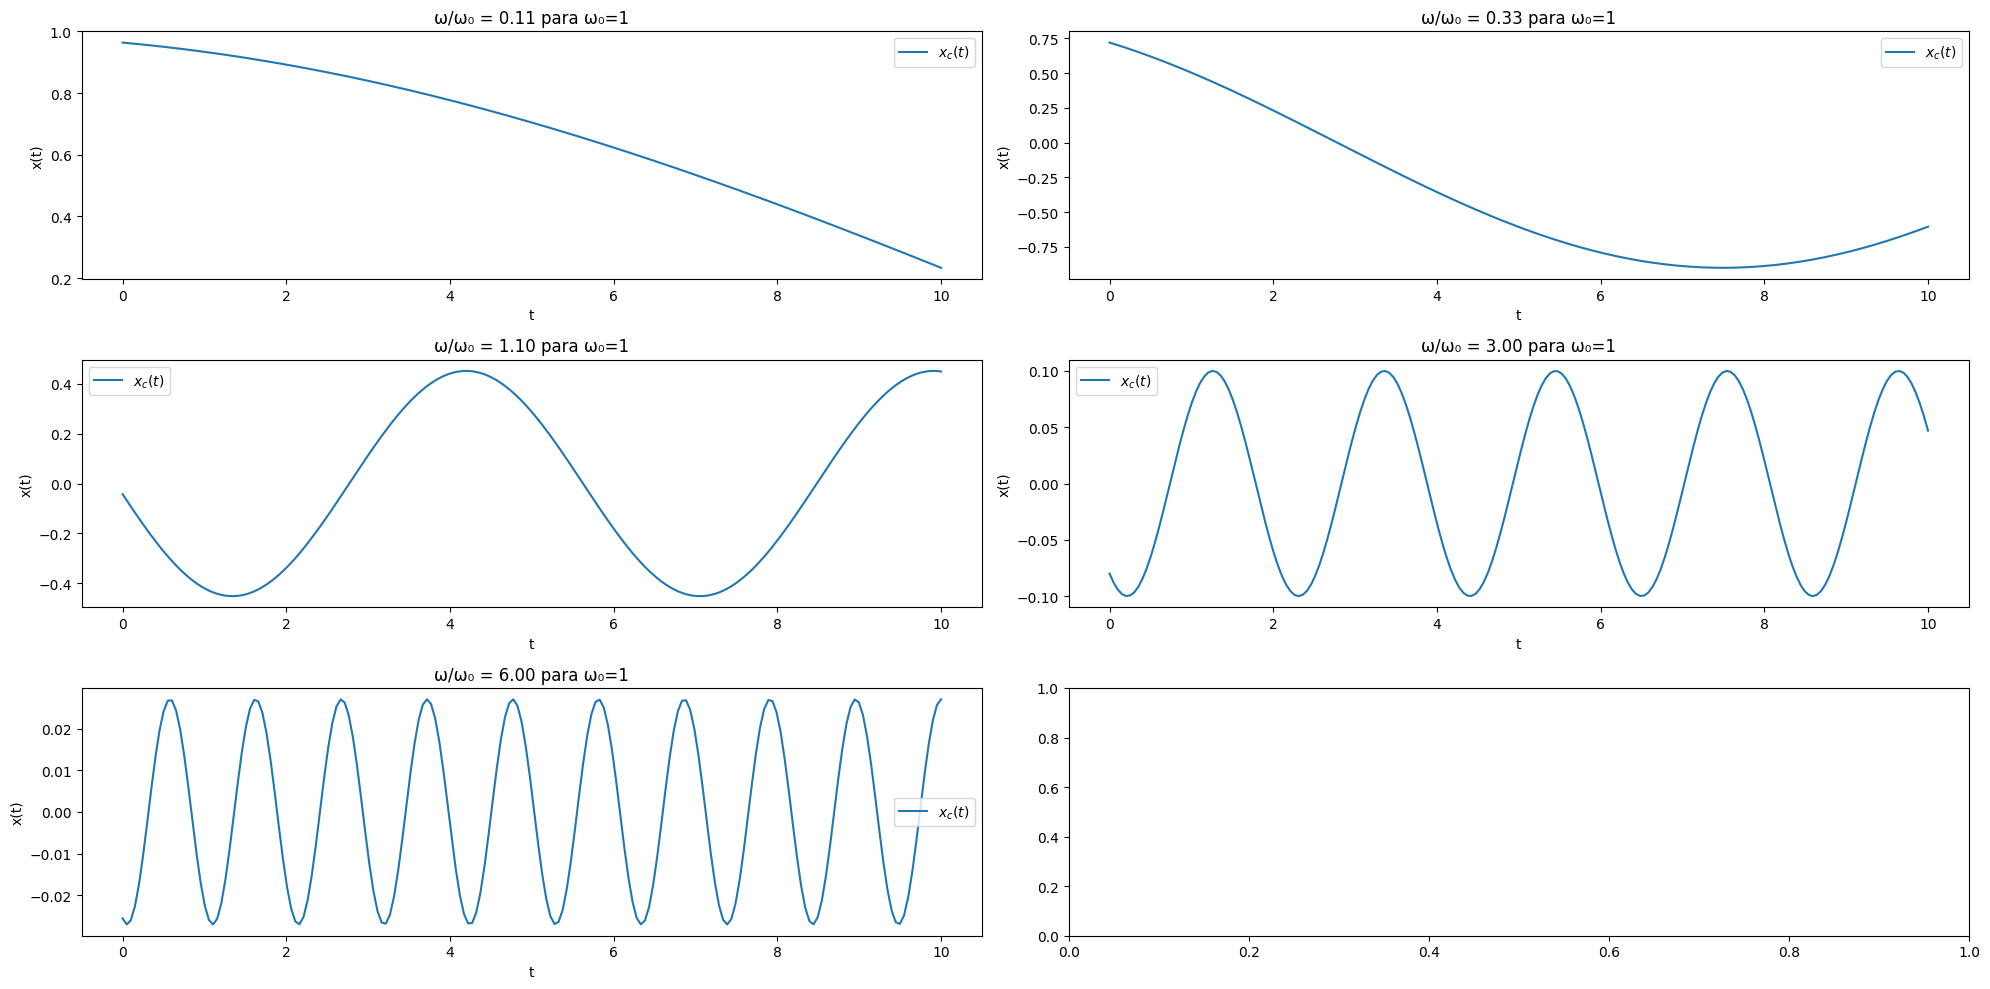

In [185]:
tempos = np.linspace(0,10,200)


fig, axes = plt.subplots(3, 2, figsize=(20, 10))
axes = axes.flatten()  # transforma a matriz 3x2 em um array 1D para facilitar a iteração

for i, omega in enumerate(omegas):
    xc_points = []
    for t in tempos:
        xc_points.append(x_c(t,omega))

    ax = axes[i]
    ax.plot(tempos, xc_points, label = r'$x_c(t)$')
    ax.set_title(f'ω/ω₀ = {omega:.2f} para ω₀=1')
    ax.set_xlabel('t')
    ax.set_ylabel('x(t)')
    ax.legend()

plt.tight_layout()
plt.show()

### 10. Oscilador Amortecido e a Função de Green.

---

**Enunciado:**
 
a) Faça um gráfico da amplitude de ressonância $A$ versus a razão de frequência $\frac{\omega}{\omega_0}$ para diferentes valores de $\gamma$.

b) Faça um gráfico da variação do ângulo de fase 𝜙 versus a razão de frequência 𝜔/𝜔0.

c) Qual é o efeito do uso de valores de 𝛾 maiores que 1 em (a) e menores que 1 em (b).

---

$\quad$ No caso de uma oscilação forçada, a expressão da amplitude de ressonância será 

$$ A(\omega) = \frac{A_0}{\sqrt{(\omega_0^2 - \omega^2)^2 - 4\omega^2 \beta^2}},$$

com $A_0$ sendo a amplitude inicial, $\omega_0$ a frequência de oscilação natural, $\omega$ a frequência da força externa, $\beta$ o coeficiente de amortecimento e $\delta$ uma constante de fase. Sabendo que $A_0 = \frac{F_0}{m}$ e que $\gamma = 2\beta$, temos

$$ A(\omega) = \frac{\frac{F_0}{m}}{\sqrt{(\omega_0^{2}-\omega^2)^2 - \omega^2 \gamma^2}}. \tag{10.1}$$

$\quad$ Assumindo alguns valores para as cosntantes

In [186]:
k = 1 # Constante elétrica.
m = 1 # Massa
F_0 = 1

$\quad$ De onde tiramos que $\omega_0 = \sqrt{\frac{k}{m}} = 1.$ Assim. a expressão **(10.1)** se torna

$$ A(\omega) = \frac{\frac{F_0}{m}}{\sqrt{(1-\omega^2)^2 - \omega^2 \gamma^2}}.$$

In [187]:
#Definindo a função A(omega)

def A(omega, gamma):
    return (F_0/m)/(np.sqrt((1-omega**2)**2 + omega**2*gamma**2))    

$\quad$ Como queremos fazer um plot da amplitude de ressonância para diferentess valores de $gamma$, vamos definir um vetor com esses diferentes valores.

In [188]:
# Valores de gamma

gammas = np.array([0, 0.1, 0.2, 0.3, 0.4], float)

$\quad$ Tambem, vemos definir um domínio com valores de $\omega$ para o plot. É interesante definirmos esse domínio próximo ao valor da frequência natural $\omega_0$, para investigar o comportamento quando $\frac{\omega}{\omega_0} = 1 $. Assim

In [189]:
omegas = np.linspace(0,2,200)

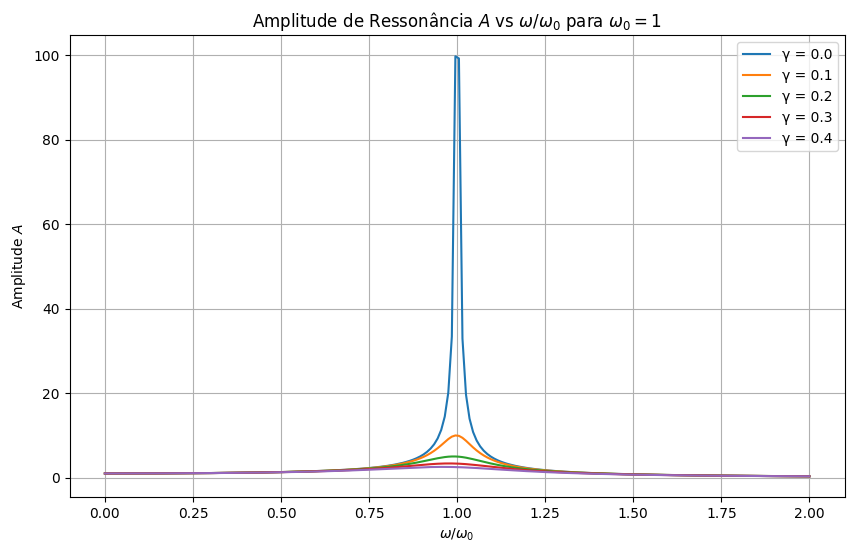

In [190]:
# Parâmetros
omega0 = 1.0  # Frequência natural

# Plot
plt.figure(figsize=(10, 6))
for gamma in gammas:
    Amplitude = A(omegas, gamma)
    plt.plot(omegas, Amplitude, label=f'γ = {gamma}')


plt.title(fr'Amplitude de Ressonância $A$ vs $\omega/\omega_0$ para $\omega_0 = 1$')
plt.xlabel(fr'$\omega/\omega_0$')
plt.ylabel('Amplitude $A$')
plt.legend()
plt.grid(True)
plt.show()

---
**Item b)**

$\quad$ A expressão para a fase $\delta$ é  

$$ \phi(\omega) = tg^{-1} \left(\frac{\gamma \omega}{\omega_0^2 - \omega^2}\right).$$

Novamente assumindo os valores definidos das constantes assumido anteiormente, com $\omega_0 = 1$, teremos

$$ \phi(\omega) = tg^{-1} \left( \frac{\gamma \omega}{1 - \omega^2}\right).$$

Como novamente queremos observar o gráfico nas proximidade de $\omega = 1$ (com $\frac{\omega}{\omega_0} = 1$), podemos utilizar o mesmo domínio de $\omega$ definido anteriormente, tal como os dados valores de $gamma$. Assim

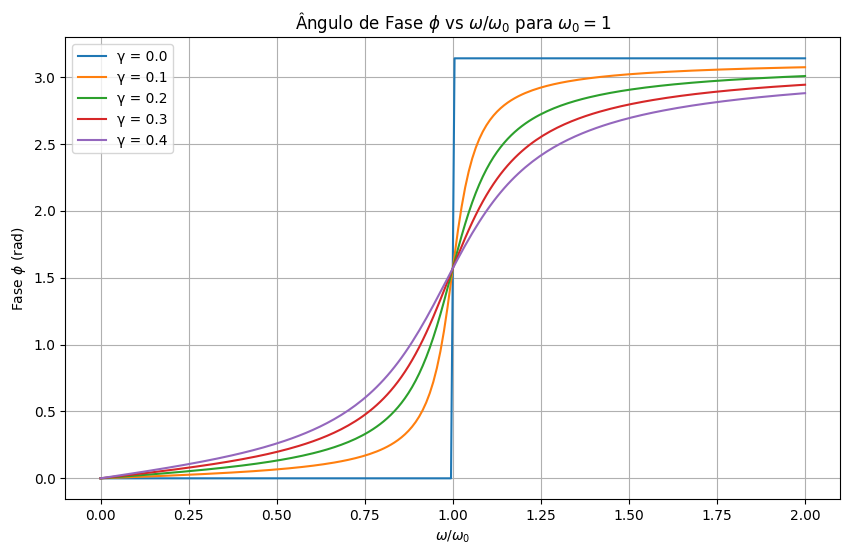

In [191]:
def phi_equation(omega, gamma):
    return np.arctan2(gamma * omega, 1 - omega**2)

plt.figure(figsize=(10, 6))
for gamma in gammas:
    phi = phi_equation(omegas, gamma)
    plt.plot(omegas, phi, label=f'γ = {gamma}')

plt.title(fr'Ângulo de Fase $\phi$ vs $\omega/\omega_0$ para $\omega_0=1$')
plt.xlabel(fr'$\omega/\omega_0$')
plt.ylabel(fr'Fase $\phi$ (rad)')
plt.legend()
plt.grid(True)
plt.show()

---

**Item c)**

pera, sla

### 11. Oscilador amortecido e Função de Green.

---
**Enunciado**: 
**Caso 1:** Um oscilador amortecido é acionado pela função de força abaixo

$F(t) = 0$ se $t<0$

$ F(t) = F_0 e^{-\gamma t}\sin{(\omega t)}$ se $t>0$

a) Usando a função de Green, represente graficamente a função resposta, bem como a força aplicada.

b) Repita o problema para o caso em que o termo $\sin{\omega t}$ da força é substituído por $\cos{\omega t}$. Quais diferenças são observadas nos dois gráficos?

---

**Item a)**

### 12. Diagrama de fase para um oscilador harmônico simples unidimensional.  

---
**Enunciado**: 

a) Construa um diagrama de fase para um oscilador harmônico simples unidimensional para diferentes valores de $E$.

b) Calcule os valores de $\omega_0$ e $\gamma$, dados valores de $𝑀$, $𝑘$, $𝑏$ e o ângulo de fase $\phi$.

c) Calcule as amplitudes correspondentes para três osciladores harmônicos simples com energias totais $𝐸_1$, $𝐸_2$ e $𝐸_3$.

d) Escreva as expressões para os deslocamentos $𝑥$ e as velocidades correspondentes $v$ para os três osciladores harmônicos e os represente graficamente.

e) Se o ângulo de fase $\phi$ é $𝜋/2$, como os diagramas de fase mudam?

(f) Como o aumento nos valores de $𝑀$, $𝑘$, $𝑏$ e $\gamma$ afeta os gráficos? 

(g) Que fatores afetam a mudança nos valores da amplitude, frequência e energia do sistema oscilante? Verifique sua resposta por meio de gráficos.

---

**Item a)**

$\quad$ Um diagrama de fase é um gráfico do tipo $\dot{x} \times x$. No caso do oscilador harmônico simples unidimensional, temos a seguinte relação

$$\frac{x^2}{\frac{ 2E}{k}} + \frac{\dot{x}^2}{\frac{2E}{m}} = 1.$$

Assim, podemos construir um diagrama de fase para dados valores de energia $E$.

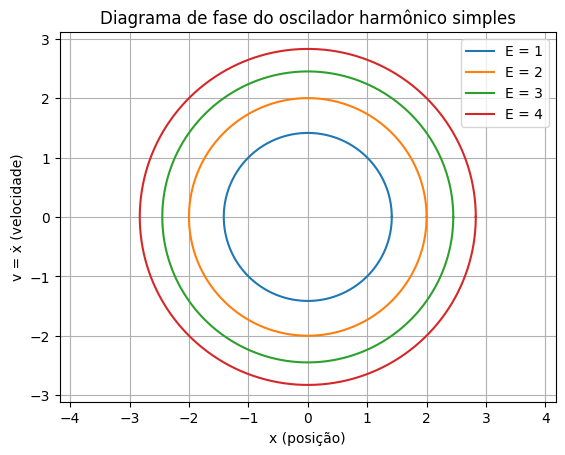

In [192]:
# Parâmetros do sistema
E = 2.0    # Energia total
m = 1.0    # Massa
k = 1.0    # Constante elástica


Es = [1, 2, 3, 4]

for E in Es: 
    # Semieixos da elipse
    a = np.sqrt(2 * E / k)  # semieixo horizontal (x)
    b = np.sqrt(2 * E / m)  # semieixo vertical (v)

    # Ângulo para parametrização da elipse
    theta = np.linspace(0, 2*np.pi, 500)
    x = a * np.cos(theta)
    v = b * np.sin(theta)

    plt.plot(x, v, label=f"E = {E}")

plt.xlabel("x (posição)")
plt.ylabel("v = ẋ (velocidade)")
plt.title("Diagrama de fase do oscilador harmônico simples")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.show()



---

**Item b)**

Dados $M$ (massa), $k$, $b$, podemos utilizar $\omega_0 = \sqrt{\frac{k}{M}}$ e $\gamma = \frac{b}{2M}$. Considerando a solução geral para o movimento de um oscilador harmônico simples

$$ x(t) = A \cos{(\omega t + \phi)}$$